In [15]:
from qiskit_experiments.library import StateTomography
from qiskit import QuantumCircuit, execute, Aer
import numpy as np
import matplotlib.pyplot as plt
import qiskit.quantum_info as qi
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.providers.aer import AerSimulator
from qiskit.providers.fake_provider import FakeParis
from qiskit.quantum_info import partial_trace, DensityMatrix
from qiskit.visualization import plot_state_city

In [36]:
# we define the range for the phase difference, such it can take all of the following values:
n = 20
s = [i * 2 * np.pi / n for i in range(n)]
#s

For $U_+ = CR_y(\theta)$

In [37]:
theta1 = np.pi/4
rho_p = []

for theta in s:
    q1 = QuantumCircuit(2)
    q1.ry(2*theta1,0) # symmetric beam-splitter
    q1.cry(theta,0,1,ctrl_state = 0) # U operator for polarization
    st = StateTomography(q1)

    backend = AerSimulator.from_backend(FakeParis())
    st_data = st.run(backend).block_for_results()
    state_result = st_data.analysis_results("state")
    p = partial_trace(state_result.value,[0])
    rho_p.append(p)


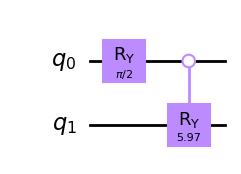

In [38]:
q1.draw('mpl')

For $U_- = I$

In [39]:
theta1 = np.pi/4
rho_m = []

for theta in s:
    q1 = QuantumCircuit(2)
    q1.ry(2*theta1,0) # symmetric beam-splitter
    #q1.cry(theta,0,1,ctrl_state = 0) # U operator for polarization
    st = StateTomography(q1)

    backend = AerSimulator.from_backend(FakeParis())
    st_data = st.run(backend).block_for_results()
    state_result = st_data.analysis_results("state")
    p = partial_trace(state_result.value,[0])
    rho_m.append(p)


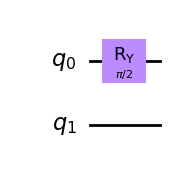

In [40]:
q1.draw('mpl')

In [45]:
d = []
for i in range(20):
    d.append(((np.abs(rho_p[i] - rho_m[i])).trace()))

In [104]:
d1 = []
for i in range(20):
    d1.append(((np.sqrt(((rho_p[i] - rho_m[i]).conjugate().partial_transpose(0)) * (rho_p[i] - rho_m[i]))).trace()))

TypeError: 'numpy.int32' object is not iterable

In [47]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import*

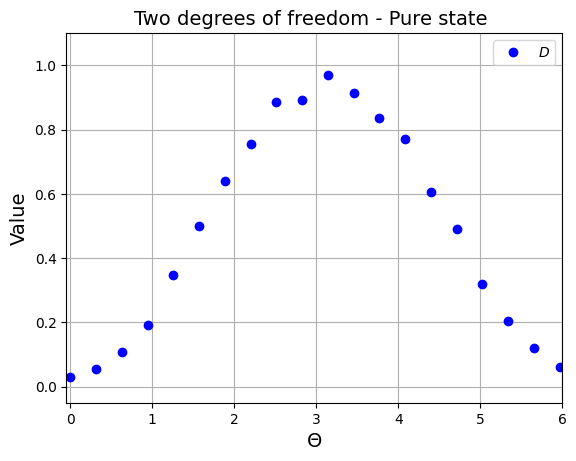

<Figure size 640x480 with 0 Axes>

In [48]:
# We can also visualize all the probabilities for all possible values of phi by plotting the probs p0 and p1
fig, ax = plt.subplots()

errorbar(s,d,fmt='b.',capsize=5,label=r"$D$",markersize=12)

ax.set_title('Two degrees of freedom - Pure state ', size=14)
#xlabel(r"$\phi$",fontsize=20);
#ylabel(r"$P$",fontsize=20);
xticks(fontsize=10); #s,rotation='horizontal',
yticks(fontsize=10);
legend(fontsize=10);
plt.xlabel("$\Theta$",size=14)
plt.ylabel("Value",size=14)
ax.set_xlim(-0.05, 6)
ax.set_ylim(-0.05, 1.1)
grid("on")
plt.legend()

fig1 = plt.gcf()
plt.show()
plt.draw()

In [77]:
rho_md = []
d1 = []
for i in range(20):
    eigenvalues, eigenvectors = np.linalg.eig(rho_m[i])
    d1.append(np.diag(eigenvalues))
    p_inv = np.linalg.inv(eigenvectors)
    rho_md.append(np.dot(p_inv,np.dot(rho_m[i],eigenvectors)))

In [78]:
rho_pd = []
d2 = []
for i in range(20):
    eigenvalues, eigenvectors = np.linalg.eig(rho_p[i])
    d2.append(np.diag(eigenvalues))
    p_inv = np.linalg.inv(eigenvectors)
    rho_pd.append(np.dot(p_inv,np.dot(rho_p[i],eigenvectors)))

In [82]:
rho_p[15]

DensityMatrix([[ 0.7405599 +0.j        , -0.22949219-0.02734375j],
               [-0.22949219+0.02734375j,  0.2594401 +0.j        ]],
              dims=(2,))


In [83]:
rho_pd[15]

array([[ 8.33591679e-01+1.73472348e-18j, -9.71445147e-17-1.47451495e-17j],
       [ 0.00000000e+00+6.93889390e-18j,  1.66408321e-01+1.17555956e-18j]])

In [84]:
d2[15]

array([[0.83359168-1.20183265e-18j, 0.        +0.00000000e+00j],
       [0.        +0.00000000e+00j, 0.16640832+1.20183265e-18j]])

In [93]:
d2[15].conj().T

array([[0.83359168+1.20183265e-18j, 0.        -0.00000000e+00j],
       [0.        -0.00000000e+00j, 0.16640832-1.20183265e-18j]])

In [89]:
di = []
for i in range(20):
    di.append(((np.sqrt((d2[i] - d1[i]).conj().T*(d2[i] - d1[i]))).trace()))

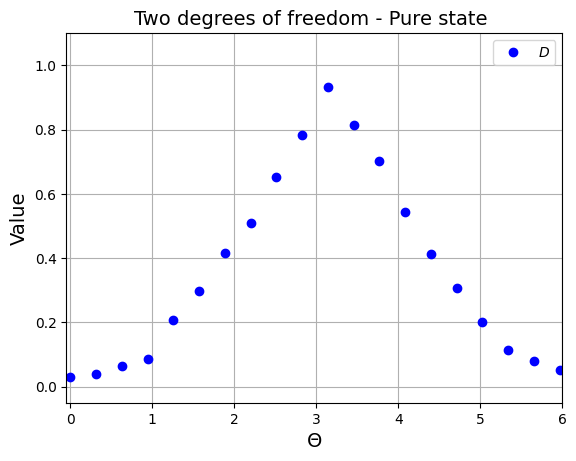

<Figure size 640x480 with 0 Axes>

In [90]:
# We can also visualize all the probabilities for all possible values of phi by plotting the probs p0 and p1
fig, ax = plt.subplots()

errorbar(s,di,fmt='b.',capsize=5,label=r"$D$",markersize=12)

ax.set_title('Two degrees of freedom - Pure state ', size=14)
#xlabel(r"$\phi$",fontsize=20);
#ylabel(r"$P$",fontsize=20);
xticks(fontsize=10); #s,rotation='horizontal',
yticks(fontsize=10);
legend(fontsize=10);
plt.xlabel("$\Theta$",size=14)
plt.ylabel("Value",size=14)
ax.set_xlim(-0.05, 6)
ax.set_ylim(-0.05, 1.1)
grid("on")
plt.legend()

fig1 = plt.gcf()
plt.show()
plt.draw()

The following is to know if the matrices are diagonalizable:

In [107]:
w = []
for i in range(20):
    w.append(np.array_equal(rho_p[i], np.diag(np.diag(rho_p[i]))))

In [108]:
w

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [109]:
w1 = []
for i in range(20):
    w1.append(np.array_equal(rho_m[i], np.diag(np.diag(rho_m[i]))))

In [110]:
w1

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]